In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand
from tqdm import tqdm
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_pickle("../../results/cluster_0.pkl")
df

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,...,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust,clusters_kmeans
185,1,0,0,0,0,0,0,1,0,0,...,0,1,2,3,6.156041,1.666667,2.5,-34.196691,16.551565,0
197,1,0,0,1,0,0,0,0,0,0,...,1,0,1,2,8.244505,1.000000,2.0,-9.582847,16.215009,0
207,0,0,1,1,0,0,0,0,0,0,...,0,0,2,3,6.798192,1.000000,2.0,-23.549976,16.084715,0
208,0,1,0,0,0,0,0,0,0,1,...,1,0,1,2,7.794999,1.000000,1.0,-9.296161,16.069521,0
214,0,0,1,0,0,0,0,1,0,0,...,0,0,2,2,10.704291,1.333333,0.5,-6.791879,15.917127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49490,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,-0.345552,-0.333333,3.5,-0.820387,-0.360497,0
49491,0,0,1,0,0,0,1,0,0,0,...,1,0,2,1,-0.234184,1.000000,3.0,-1.580706,-0.360497,0
49492,0,1,0,1,0,0,0,0,0,0,...,1,0,2,2,-0.266836,-0.333333,0.0,-0.203972,-0.360958,0
49493,0,1,0,1,0,0,0,0,0,0,...,1,0,2,1,-0.093488,0.666667,0.0,-0.133305,-0.360958,0


In [3]:
df2=pd.read_pickle("../../results/cluster_sinencod_0.pkl")
df2

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
185,First Class,Consumer,EU,Technology,1440.840,8,0.5,-1268.040,367.35,Critical,0
197,Second Class,Consumer,APAC,Office Supplies,1900.584,6,0.4,-348.516,360.04,High,0
207,Same Day,Home Office,APAC,Furniture,1582.200,6,0.4,-870.300,357.21,Critical,0
208,Second Class,Corporate,US,Office Supplies,1801.632,6,0.2,-337.806,356.88,High,0
214,First Class,Home Office,EU,Furniture,2442.069,7,0.1,-244.251,353.57,High,0
...,...,...,...,...,...,...,...,...,...,...,...
49490,Standard Class,Corporate,Africa,Office Supplies,9.612,2,0.7,-21.168,0.02,Medium,0
49491,First Class,Home Office,EMEA,Office Supplies,34.128,6,0.6,-49.572,0.02,Medium,0
49492,Same Day,Corporate,APAC,Office Supplies,26.940,2,0.0,1.860,0.01,High,0
49493,Same Day,Corporate,APAC,Office Supplies,65.100,5,0.0,4.500,0.01,Medium,0


In [4]:
df=df.drop(columns=["clusters_kmeans","Profit_robust","Quantity_robust","Discount_robust"])

In [5]:
df["Sales_robust"]=df2["Sales"]

In [6]:
x=df.drop("Sales_robust",axis=1)
y=df[["Sales_robust"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [7]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 4, 5], 
    'min_samples_split': [5, 10, 20],  
    'min_samples_leaf': [2, 5, 10]  
}

# Configurar el GridSearchCV
model_GradientBoosting = GridSearchCV(
    GradientBoostingRegressor(random_state=42), 
    param_grid, 
    cv=5,  
    scoring='neg_mean_squared_error',  
    verbose=2,
    n_jobs=-1  
)

# Ajustar el modelo con el conjunto de entrenamiento reducido
print("\n Iniciando búsqueda de hiperparámetros con GridSearchCV...\n")
model_GradientBoosting.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de validación
model_GradientBoostingRegressor = model_GradientBoosting.best_estimator_



 Iniciando búsqueda de hiperparámetros con GridSearchCV...

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [8]:
y_train_pred=model_GradientBoostingRegressor.predict(x_train)
y_test_pred=model_GradientBoostingRegressor.predict(x_test)

In [9]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.842700,46.914100,8998.265400,94.859200
Test,0.806900,50.204600,11196.157500,105.811900
Diferencia Train-Test,0.035800,-3.290500,-2197.892100,-10.952700
Porcentaje diferencia (%),1.085100,-1.694100,-5.441800,-2.729000
Rango valores,2951.155000,2951.155000,2951.155000,2951.155000
Ratio Rango (%),0.027948,1.645435,342.144396,3.399874
Influencia dif rango (%),0.001200,0.111500,74.475700,0.371100
Media,171.514200,171.514200,171.514200,171.514200
Ratio Media(%),0.480893,28.312146,5887.099406,58.499850
Influencia dif media (%),0.020900,1.918500,1281.463600,6.385900


El modelo presenta un excelente ajuste en el conjunto de entrenamiento y una notable capacidad de generalización en el conjunto de prueba, con diferencias mínimas entre ambos. Los errores (MAE, MSE, RMSE) son bajos y consistentes, lo que lo hace adecuado para predicciones confiables. Aunque su desempeño es sólido, pequeñas mejoras podrían reducir el impacto de los errores relativos en valores extremos.

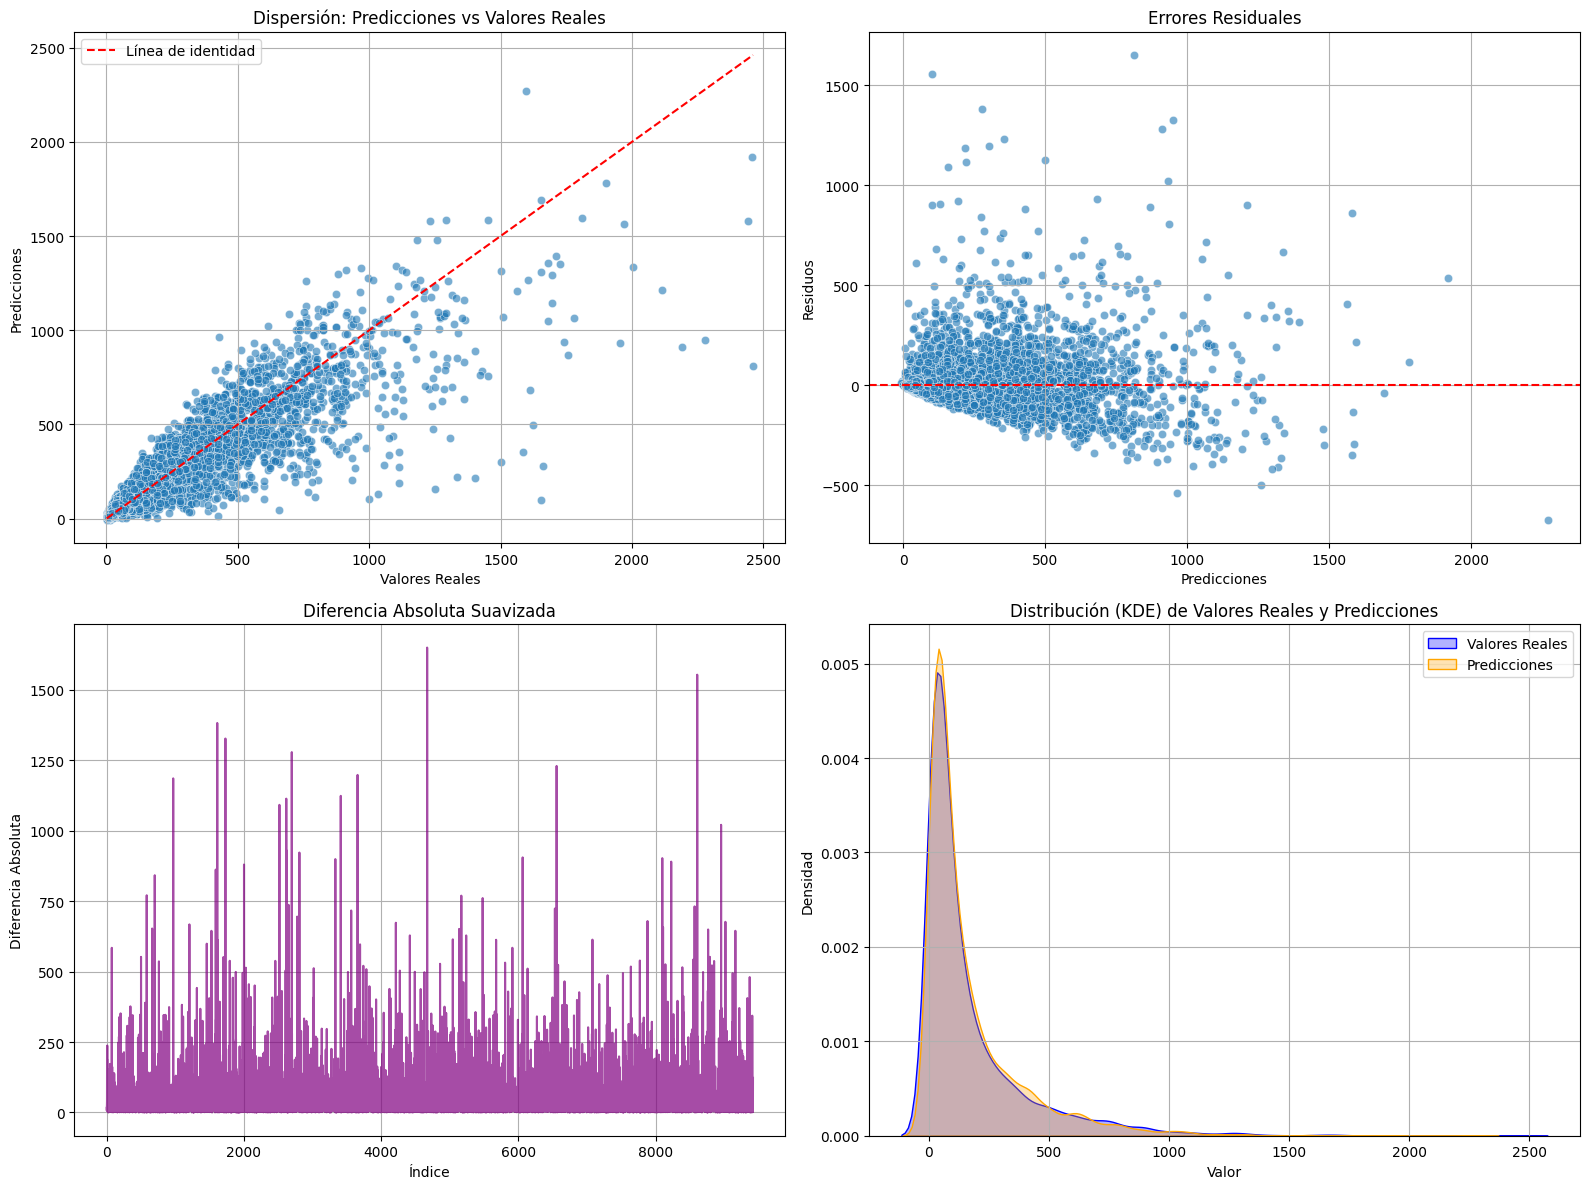

In [10]:
sp.comparativa_graficos(y_test, y_test_pred)

Gráfico superior izquierdo: Dispersión (Predicciones vs Valores Reales)
- Las predicciones se ajustan razonablemente bien a los valores reales en rangos bajos y medios, con una buena alineación con la línea de identidad. Sin embargo, para valores altos, las predicciones tienden a subestimarse, evidenciado por la dispersión de los puntos por debajo de la línea. La concentración de puntos en los valores más bajos sugiere que el modelo se desempeña mejor en este rango.

Gráfico superior derecho: Errores Residuales
- Los residuales están centrados cerca de cero, lo que indica un buen ajuste promedio del modelo. No obstante, hay una mayor dispersión para predicciones altas, donde los errores tienden a ser mayores. Esto sugiere que el modelo tiene dificultades para capturar correctamente valores extremos.

Gráfico inferior izquierdo: Diferencia Absoluta Suavizada
- Las diferencias absolutas están relativamente controladas en la mayoría de los puntos, con valores menores a 500 en gran parte de los datos. Sin embargo, existen picos significativos que destacan como errores grandes, probablemente causados por outliers o inconsistencias en el ajuste del modelo en ciertos casos.

Gráfico inferior derecho: Distribución (KDE) de Valores Reales y Predicciones
- Las distribuciones de valores reales y predicciones son muy similares, lo que indica que el modelo captura bien la tendencia general de los datos. Sin embargo, la curva de las predicciones es ligeramente más estrecha en comparación con la de los valores reales, lo que confirma una menor capacidad para capturar la dispersión total de los datos, especialmente en valores extremos.



In [11]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_GradientBoostingRegressor_cluster_0.pkl', 'wb') as file:
    pickle.dump(model_GradientBoostingRegressor, file)